<a href="https://colab.research.google.com/github/ajrahar/example/blob/main/trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Install and import libraries
!pip install seaborn matplotlib pandas scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 2. Download dataset directly (Boston Housing alternative)
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

--2025-07-28 07:52:49--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  34.90K  --.-KB/s    in 0.002s  

2025-07-28 07:52:49 (21.1 MB/s) - ‘BostonHousing.csv’ saved [35735/35735]



In [ ]:
# 3. Load and explore data
df = pd.read_csv('BostonHousing.csv')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (506, 14)

First 5 rows:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 n

In [ ]:
# 4. Basic statistics
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std   

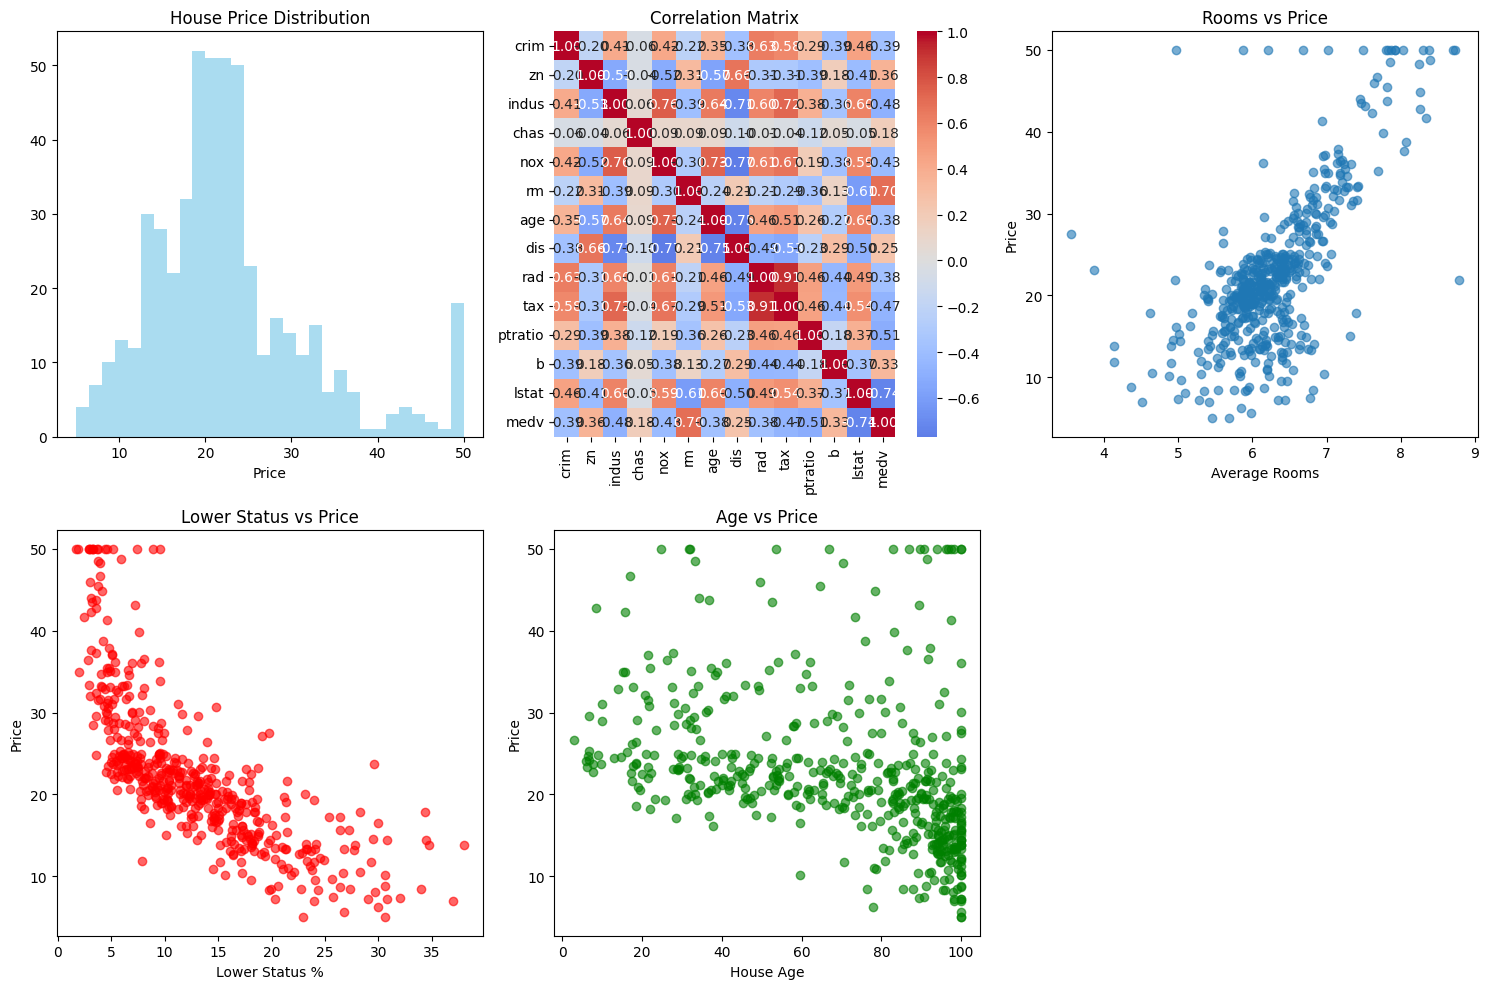

In [ ]:
# 5. Data visualization
plt.figure(figsize=(15, 10))

# Price distribution
plt.subplot(2, 3, 1)
plt.hist(df['medv'], bins=30, color='skyblue', alpha=0.7)
plt.title('House Price Distribution')
plt.xlabel('Price')

# Correlation heatmap
plt.subplot(2, 3, 2)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')

# Scatter plots
plt.subplot(2, 3, 3)
plt.scatter(df['rm'], df['medv'], alpha=0.6)
plt.xlabel('Average Rooms')
plt.ylabel('Price')
plt.title('Rooms vs Price')

plt.subplot(2, 3, 4)
plt.scatter(df['lstat'], df['medv'], alpha=0.6, color='red')
plt.xlabel('Lower Status %')
plt.ylabel('Price')
plt.title('Lower Status vs Price')

plt.subplot(2, 3, 5)
plt.scatter(df['age'], df['medv'], alpha=0.6, color='green')
plt.xlabel('House Age')
plt.ylabel('Price')
plt.title('Age vs Price')

plt.tight_layout()
plt.show()

In [ ]:
# 6. Feature selection and model preparation
# Select features (all except target)
X = df.drop('medv', axis=1)
y = df['medv']

print("Features:", X.columns.tolist())
print("Target:", 'medv (median house value)')

Features: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
Target: medv (median house value)


In [ ]:
# 7. Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Model training completed!")

Model training completed!


In [ ]:
# 8. Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Model explains {r2*100:.1f}% of price variation")

Mean Squared Error: 24.29
R² Score: 0.67
Model explains 66.9% of price variation


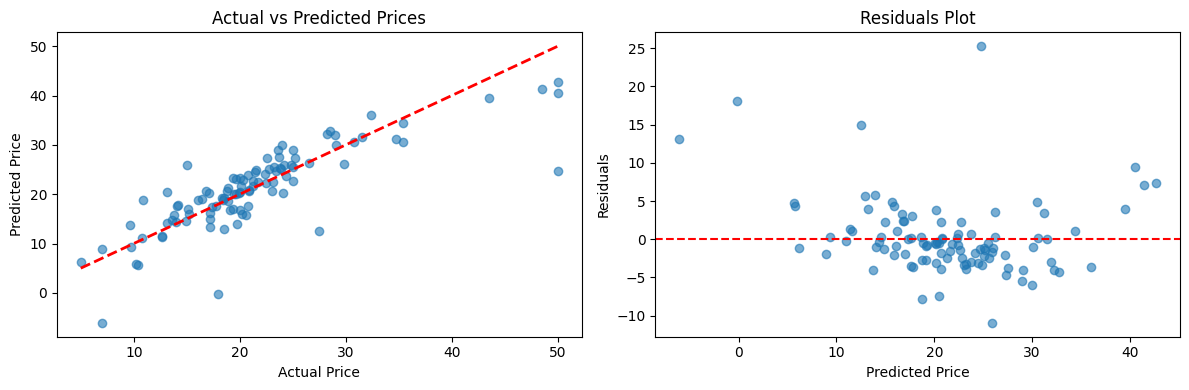

In [ ]:
# 9. Visualize predictions
plt.figure(figsize=(12, 4))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

In [ ]:
# 10. Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (by coefficient magnitude):")
print(feature_importance[['Feature', 'Coefficient']].head(10))

Feature Importance (by coefficient magnitude):
    Feature  Coefficient
4       nox   -17.202633
5        rm     4.438835
3      chas     2.784438
7       dis    -1.447865
10  ptratio    -0.915456
12    lstat    -0.508571
8       rad     0.262430
0      crim    -0.113056
2     indus     0.040381
1        zn     0.030110


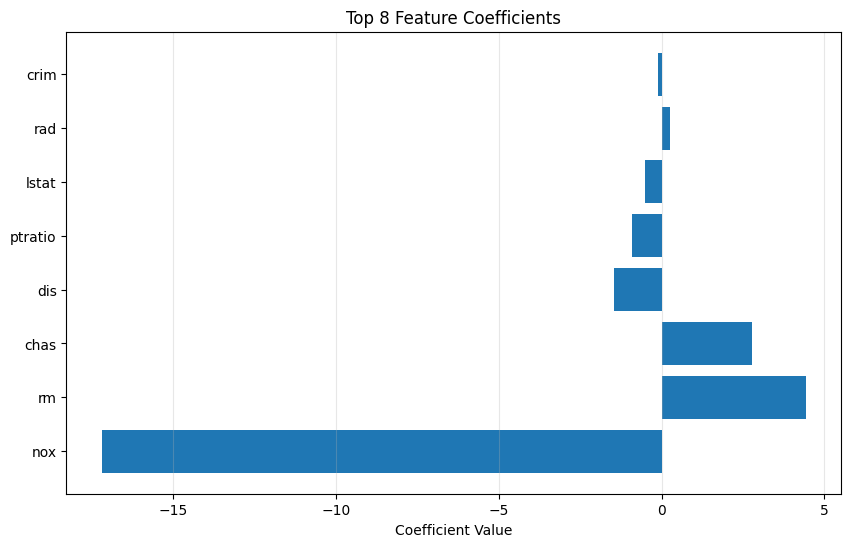

In [ ]:
# 11. Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(8)
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top 8 Feature Coefficients')
plt.grid(axis='x', alpha=0.3)
plt.show()

In [ ]:
# 12. Summary and insights
print("=== PROJECT SUMMARY ===")
print(f"Dataset: {len(df)} houses analyzed")
print(f"Features used: {len(X.columns)}")
print(f"Model accuracy (R²): {r2:.3f}")
print(f"Average house price: ${y.mean():.2f}k")
print(f"Price range: ${y.min():.1f}k - ${y.max():.1f}k")

print("\n=== KEY INSIGHTS ===")
print("• Higher number of rooms increases house price")
print("• Lower status percentage decreases house price")
print("• Crime rate negatively affects house price")
print("• Model can predict house prices with reasonable accuracy")

=== PROJECT SUMMARY ===
Dataset: 506 houses analyzed
Features used: 13
Model accuracy (R²): 0.669
Average house price: $22.53k
Price range: $5.0k - $50.0k

=== KEY INSIGHTS ===
• Higher number of rooms increases house price
• Lower status percentage decreases house price
• Crime rate negatively affects house price
• Model can predict house prices with reasonable accuracy
